# Assignment 7

In this assignment, you will implement back propagatio. You will implement on top of your implemented functions from assignment 6.

In this assignment you will implement the backpropgation algorithm and train the network designed in assignment 6 on the Planar dataset. You will load the data pass it to the network (forward-propagation), calculate the error then pass the error backword to update the weights (back-propagation). You can either implement the SGD, mini-batch or full-batch. maybe the esiest is the full-batch in this case. 

In [66]:
# import all needed libraries
import numpy as np
import matplotlib.pyplot as plt
from data_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

%matplotlib inline

In [67]:
# Important: Use seed of 0
np.random.seed(0)

## Step1: Loading dataset

The following line will load the planar dataset. The feature space is two dimensional and the classification is binary.

In [68]:
#load the data and the features
features, labels = load_planar_dataset()

You are asked to implement the <b>SAME</b> network from assignment 6. You can add your code from assignment 6 (data loading, weight initialization, forward propagation, and computing cost) in the cell below. 

<b>Note: I encourage you to use your solutions from Assignment6. If you want  to have the instructor solutions for assignment-6, please contact the TA but you have to have your assignment 6 submitted.</b>

Here is the network again:

![Network.PNG](Network.PNG)



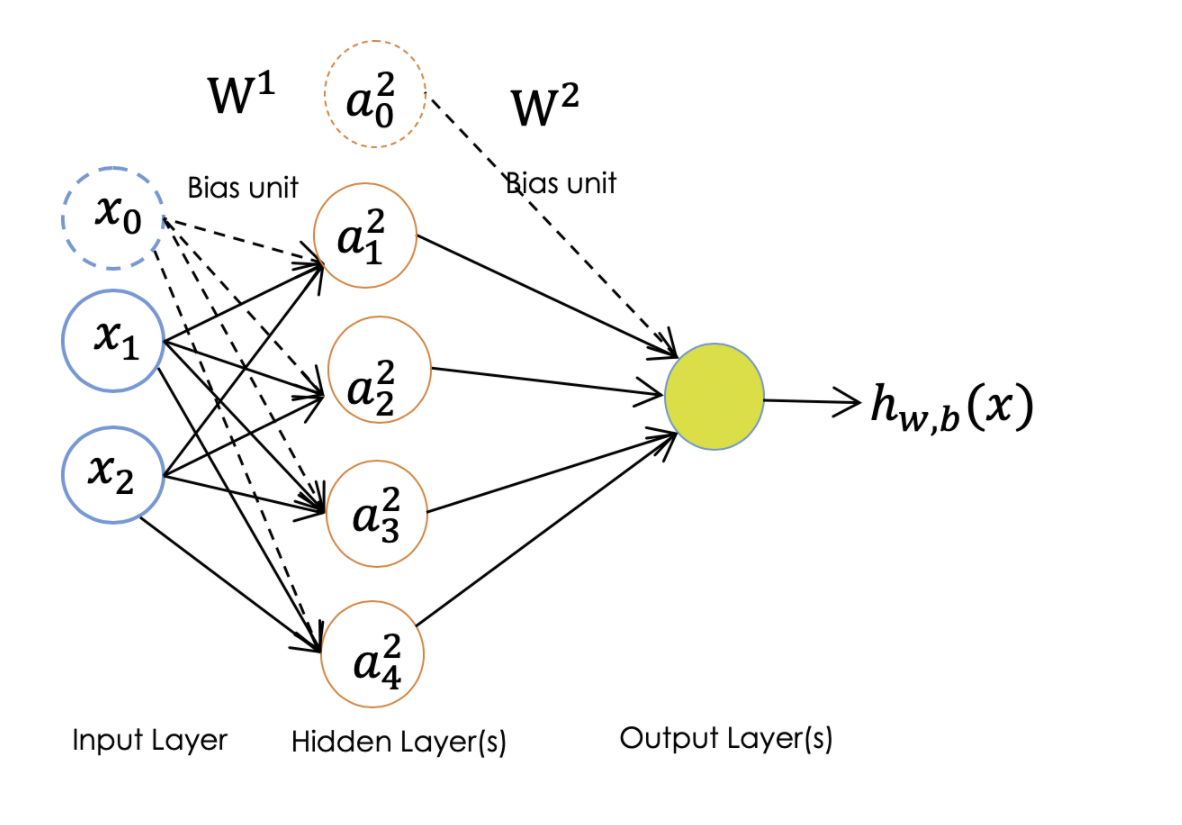

In [69]:
def initialize_parameters(input_size, hidden_size, output_size):
    """
    input_size-- size of the input layer
    hidden_size -- size of the hidden layer
    output_size-- size of the output layer
    """
    
    Weight1 = np.random.rand(hidden_size, input_size + 1) # have the W1 diminsions defined here, the return should be a matrix initalized randomly.  
    Weight2 = np.random.rand(output_size, hidden_size + 1) # have the W2 diminsions defined here, the return should be a matrix initalized randomly.
    
    parameters = {'Weight1' : Weight1, 'Weight2' : Weight2}
    
    """
    Returns:
    params -- python dictionary containing your parameters:
                    W1 -- weight matrix 1
                    W2 -- weight matrix 2 
    """
    return parameters

In [70]:
def forward_prop(X, parameters):
    """
    X -- input data
    parameters -- python dictionary containing your parameters (output of initialization function)
    """
    
    # Retrieve your weights from the "parameters" dictionary
    Weight1 = parameters['Weight1'] 
    Weight2 = parameters['Weight2'] 
    
    # Add bias term to X
    one = np.ones(X.shape[1])  
    X = np.vstack((one, X)) 
    
    # Compute pass from layer 1 to layer 2 and activation
    z2 = np.dot(Weight1,X)
    a2 = np.tanh(z2) * 1
    
    # add bias term to a2
    one = np.ones(a2.shape[1])
    a2  = np.vstack((one, a2))
    
    # Compute pass from layer 2 to layer 3 and activation
    z3 = np.dot(Weight2, a2)
    a3 = sigmoid(z3)
    
    
    #The values will be needed for the backpropagation which are stored in cache. Later, it will be given to back propagation.
    cache = {"z2": z2,
             "a2": a2,
             "z3": z3,
             "a3": a3}
    """
    Returns:
    a3 -- The sigmoid output of the second activation
    cache -- a dictionary containing "z2", "a2", "z3" and "a3"
    """
    return np.array(a3), cache

In [71]:
def compute_cost(a3, Y):
    """
    Computes the cross-entropy cost given in equation (7) or in whichever way you choose.
    
    Arguments:
    a3 -- The sigmoid output of the second activation
    Y -- "true" labels vector of shape 
    """
    m = Y.shape[1]  # number of example

    # Compute the cross-entropy cost
    cost = -(1.0/m) * np.sum(Y*np.log(a3) + (1-Y)*np.log(1-a3))
    
    return cost

## Question 1 - 15 points
Backpropagation is one of the most important parts of training neural networks. The following will implement ONE backpropagation iteration (You can perform full batch updates by feeding all of your samples in X (3x400)). 

Mathematical formula's are given below for your convenience.<br><br>Remember that you need to find the derivative of any weight with respect to the cost function. Then, multiply it with the activation function in order to update using the GD algorithm. The equations below apply to the three-layers network that you are implementing. Where x in $(a^{(x)}, z^{(x)}, W^{(x)})$ refer to the layer number and $dW^{(1)}$ are the gradients from layer 1 and $dW^{(2)}$ are the gradients from layer 2: 

 
 ![bp.PNG](bp.PNG)
 
<br>Hint:<br>- To compute $\delta^{(2)}$ you'll need to compute $g'(z^{(2)})$.  <br>- Remember that you have two different activation functions, for $\delta^{(2)}$ the activation function is tanh(x).<br>- Derivative of tanh(x) = 1 - $tanh(x)^2$
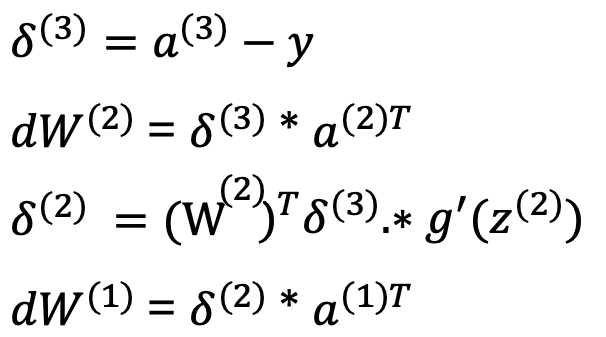

In [107]:
def backward_propagation(parameters, cache, X, Y):
    """
    parameters -- dictionary containing weights 
    cache -- a dictionary containing "z2", "a2", "z3" and "a3".
    X -- input data
    Y -- "true" labels vector 
    """
    m = X.shape[1]
    
    # Copy W1 and W2 from the dictionary "parameters"
    Weight1 = parameters['Weight1']
    Weight2 = parameters['Weight2']
    
    # Append ones column
    one = np.ones(X.shape[1])
    X = np.vstack((one, X))
    
    # Copy A1 and A2 from dictionary "cache"
    z2 = cache['z2'] 
    a2 = cache['a2'] 
    a3 = cache['a3'] 
    
    #  calculate d3, dW2. Hint: Take a look on how we calculated dW1 and d2 below.
    d3 =  np.subtract(a3, Y)
    dW2 = np.dot(d3, a2.T)
    
    # Below we will calculate delta 2. In the hidden layer, we have bias which we will exclude for the backprop step.
    # We will be using tanh were as an activation function
    d2 = Weight2.T @ d3
    d2 = d2[1:]
    d2 = d2 * (1 - np.power(np.tanh(z2), 2))
    
    dW1 = d2 @ X.T 
    
    # In the gradient dict we will hold the update for our weight vectors
    gradient = {"dW1": 1/m*dW1,
                "dW2": 1/m*dW2}
    
    return gradient

In [108]:
# Test function for backward propagation
np.random.seed(0) 
X_test = np.random.randn(2, 1)
Y_test = np.random.randn(1, 1)

parameters = {
    'Weight1': 
        np.array([[-0.00416758, -0.00056267,-0.0005612345],
                  [-0.02136196,  0.01640271,0.0005612343],
                  [-0.01793436, -0.00841747,-0.0005612365],
                  [ 0.00502881, -0.01245288,-0.0005211234]]),
    'Weight2': 
        np.array([[-0.01057952, -0.00909008,0.00551432,  0.00551454,  0.02292208]])
}

cache = {
    'z2': np.array([[-0.00616586],
                    [-0.05229879],
                    [-0.02009991],
                    [0.02153007]]),
    'a2': np.array([[1],
                    [-0.05225116],
                    [-0.02009721],
                    [0.02152675],
                    [0.02152675]]),
    'z3': np.array([[ 0.00092281]]),
    'a3': np.array([[ 0.5002307]])  
}

grads = backward_propagation(parameters, cache, X_test, Y_test)

print ("dW1 = "+ str(grads["dW1"]))
print ("dW2 = "+ str(grads["dW2"]))

# Desired Output:

#  dW1 = [[ 0.0043495   0.00767275  0.00174049]
#   [-0.00263144 -0.00464199 -0.00105299]
#   [-0.00263768 -0.00465301 -0.00105549]
#   [-0.0109633  -0.01933983 -0.00438704]]
#  dW2 = [[-0.47850728  0.02500256  0.00961666 -0.01030071 -0.01030071]]

dW1 = [[ 0.0043495   0.00767275  0.00174049]
 [-0.00263144 -0.00464199 -0.00105299]
 [-0.00263768 -0.00465301 -0.00105549]
 [-0.0109633  -0.01933983 -0.00438704]]
dW2 = [[-0.47850728  0.02500256  0.00961666 -0.01030071 -0.01030071]]


### Question 2 - 10 points 
How many parameters you need to train for the network used in this assignment? If one more hidden layer is added to the network with four nerouns, how many parameters you need to train?

We must train weights for each of the synapses(edges) in the network.
Not including the bias neurons that leaves 12 parameters to train

number of params = 12 edges/weights

If 1 more layer with 4 hidden neurons(nodes) are added then the network will need to be trained for 16 additional parameters.  Assuming an edge will be added from each of the previous layer (4 nodes) to each of the new 4 neurons.

4*4 = 16 new edges

If 1 more layer is added and you only wire each new node to a single node in the previous hidden layer then only 4 more parameters will be required for training

4*1 = 4 new edges


### Question 3 - 15 points 
The update rule will allow you to update the weights and pass the gradients through the network.
Now, Implement the update rule using your known gradients. 

In [109]:
def update_parameters(parameters, grads, learning_rate = 0.5):
    """
    parameters -- dictionary containing network weights 
    grads -- dictionary containing gradients 
    learning_rate -- learning rate for gradient update
    """
    # Copy the following parameter from the dictionary "parameters"
    Weight1 = parameters['Weight1'] 
    Weight2 = parameters['Weight2'] 
     
    # Copy each gradient from the dictionary "grads"
    dW1 = grads['dW1']
    dW2 = grads['dW2']
    
    # Update rule for each parameter. use the vecortized update role.  
    Weight1 = parameters['Weight1'] - (learning_rate * dW1)
    Weight2 = parameters['Weight2'] - (learning_rate * dW2)
    
    parameters = {"Weight1": Weight1,
                  "Weight2": Weight2}
    
    """
    Returns:
    parameters -- dictionary containing updated parameters
    """
    return parameters

In [110]:
# test function update_parameters
np.random.seed(0) 

parameters = {
    'Weight1':
        np.array([[-0.00416758, -0.00056267,-0.00056127],
                  [-0.02136196,  0.01640271,-0.00056123],
                  [-0.01793436, -0.00841747,-0.00036123],
                  [ 0.00502881, -0.01245288,-0.00026117],]),
    'Weight2': 
        np.array([[-0.01057952, -0.00909008,  0.00551454, 0.02292208,0.02292223]])
}

grads = {
    'dW1': 
        np.array([[ 0.00023322, -0.00205423,-0.00205423],
                  [ 0.00082222, -0.00700776,-0.00205423],
                  [-0.00031831,  0.0028636,-0.00205423 ],
                  [-0.00092857,  0.00809933,-0.00205423]]),
    'dW2': 
        np.array([[-1.75740039e-05, 3.70231337e-03, -1.25683095e-03, -2.55715317e-03, -2.55715317e-03]])
}

parameters = update_parameters(parameters, grads)

print("Weight1 = " + str(parameters["Weight1"]))
print("Weight2 = " + str(parameters["Weight2"]))


# Desired Output:

# Weight1 = [[-0.00428419  0.00046445  0.00046585]
#  [-0.02177307  0.01990659  0.00046589]
#  [-0.0177752  -0.00984927  0.00066589]
#  [ 0.00549309 -0.01650255  0.00076595]
# Weight2 = [[-0.01057073 -0.01094124  0.00614296  0.02420066  0.02420081]]

Weight1 = [[-0.00428419  0.00046445  0.00046585]
 [-0.02177307  0.01990659  0.00046589]
 [-0.0177752  -0.00984927  0.00066589]
 [ 0.00549309 -0.01650255  0.00076595]]
Weight2 = [[-0.01057073 -0.01094124  0.00614296  0.02420066  0.02420081]]


### Question 4 - 10 points 

If you initlize the network randomly, are you going to land to the same solution (netwrok parameters (weights)) everytime you train your network in case you trained the network same number of epochs  everytime ? why or why not?

Assuming you changed the seed value and trained randomley you would get differnt solutions.

Changing the epochs will also change the results for both random training and training with a common seed value for random weight assignment.

### Question 5 - 20 points 

The mentioned building blocks are now complete. It is time to put it all together. Implement a functioning neural network model given the various functions created above. Note: you might need to define your num_epochs and learning_rate to get it to work.

In [111]:
def model(X, Y, n_h, num_epochs=1000, learning_rate=0.1, print_cost=True):
    """
    X -- dataset
    Y -- labels
    n_h -- size of the hidden layer
    learning_rate=the learning rate you are choosing,
    num_epochs -- Number of iterations in gradient descent
    print_cost -- if True, print the cost in every 100 iterations
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    n_x = X.shape[0]
    n_y = len(np.unique(Y))
    
    if n_y <= 2:
        n_y = 1
    
    # Initialize parameters
    parameters = initialize_parameters(n_x, n_h, n_y)
    Weight1 = parameters['Weight1']
    Weight2 = parameters['Weight2']
    
    # gradient descent
    for i in range(num_epochs):
         
        # Call the Forward propagation with X, and parameters.
        a3, cache = forward_prop(X, parameters)
        
        # Call the Cost function with a3, Y and parameters.
        cost = compute_cost(a3,Y)
        
        # Call Backpropagation with Inputs, parameters, cache, X and Y.
        grads = backward_propagation(parameters, cache, X, Y)
        
        # Update gradient descent parameter with  parameters and grads and learning rate.
        parameters = update_parameters(parameters=parameters, grads=grads, learning_rate=learning_rate)
        
        # Print the cost every 100 iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    return parameters

### Question 6 -- 15 points

Now, you have the model in your hand.It is time to use it and see it in action. Use the model to predict  using the function named predict and also plot the decision boundary. Comment on the results and explain if they make sense or not?

Hint:Use forward propagation to predict results.


In [112]:
def predict(parameters, X):
    """
    Using the learned parameters, predicts a class for each example in X
    
    parameters -- dictionary containing your weights 
    X -- input data
    
    Returns
    predictions -- vector of model predictions (red: 0 / blue: 1)
    """
    
    # Computes probabilities using forward propagation from assignment 6, 
    # classifies to 0/1 using 0.5 as the threshold.
    a3, cache = forward_prop(X, parameters)
    predictions = (a3 > 0.5)
    return predictions

Cost after iteration 0: 0.935154
Cost after iteration 100: 0.649025
Cost after iteration 200: 0.634919
Cost after iteration 300: 0.621228
Cost after iteration 400: 0.611614
Cost after iteration 500: 0.605324
Cost after iteration 600: 0.582812
Cost after iteration 700: 0.504698
Cost after iteration 800: 0.447947
Cost after iteration 900: 0.414061
Cost after iteration 1000: 0.392880
Cost after iteration 1100: 0.378601
Cost after iteration 1200: 0.368319
Cost after iteration 1300: 0.360517
Cost after iteration 1400: 0.354356
Cost after iteration 1500: 0.349336
Cost after iteration 1600: 0.345145
Cost after iteration 1700: 0.341576
Cost after iteration 1800: 0.338486
Cost after iteration 1900: 0.335775
Cost after iteration 2000: 0.333368
Cost after iteration 2100: 0.331210
Cost after iteration 2200: 0.329260
Cost after iteration 2300: 0.327485
Cost after iteration 2400: 0.325858
Cost after iteration 2500: 0.324359
Cost after iteration 2600: 0.322971
Cost after iteration 2700: 0.321680
Cost

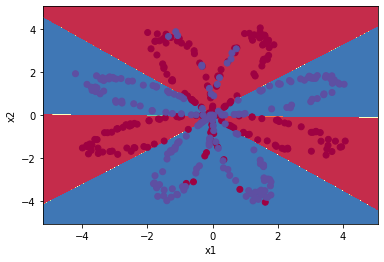

In [113]:
# Build a model with a n_h-dimensional hidden layers
parameters = model(features, labels, 4, 15000)

# plot the decision boundary
plot_decision_boundary(lambda X: predict(parameters, X.T), features, labels.ravel())

### Question 7 -- 15 points

If the input to the network all zeros (remeber that the bias must still 1), is the output will be all zeros? why or why not?

No the output will grow as it gets increased by the bias of each hidden layer until it reaches the output layer

# Grad Student or Undergrad Extra Credit

### Question 8 -- 15 points

Try out several models of different hidden layer size (different number of neurons) to see how this hyper-parameter effects accuracy.

Cost after iteration 0: 1.439807
Cost after iteration 100: 0.649007
Cost after iteration 200: 0.603556
Cost after iteration 300: 0.515700
Cost after iteration 400: 0.452589
Cost after iteration 500: 0.418524
Cost after iteration 600: 0.397786
Cost after iteration 700: 0.384064
Cost after iteration 800: 0.374288
Cost after iteration 900: 0.366904
Cost after iteration 1000: 0.361068
Cost after iteration 1100: 0.356293
Cost after iteration 1200: 0.352276
Cost after iteration 1300: 0.348821
Cost after iteration 1400: 0.345797
Cost after iteration 1500: 0.343113
Cost after iteration 1600: 0.340701
Cost after iteration 1700: 0.338514
Cost after iteration 1800: 0.336513
Cost after iteration 1900: 0.334671
Cost after iteration 2000: 0.332965
Cost after iteration 2100: 0.331377
Cost after iteration 2200: 0.329892
Cost after iteration 2300: 0.328498
Cost after iteration 2400: 0.327186
Cost after iteration 2500: 0.325946
Cost after iteration 2600: 0.324772
Cost after iteration 2700: 0.323656
Cost

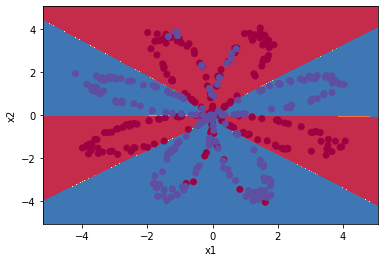

In [114]:
# 8 hidden layers
parameters = model(features, labels, 8, 15000)

plot_decision_boundary(lambda X: predict(parameters, X.T), features, labels.ravel())

Cost after iteration 0: 2.576523
Cost after iteration 100: 0.577786
Cost after iteration 200: 0.489245
Cost after iteration 300: 0.433797
Cost after iteration 400: 0.402413
Cost after iteration 500: 0.383614
Cost after iteration 600: 0.371076
Cost after iteration 700: 0.361856
Cost after iteration 800: 0.354572
Cost after iteration 900: 0.348539
Cost after iteration 1000: 0.343381
Cost after iteration 1100: 0.338859
Cost after iteration 1200: 0.334805
Cost after iteration 1300: 0.331097
Cost after iteration 1400: 0.327647
Cost after iteration 1500: 0.324394
Cost after iteration 1600: 0.321297
Cost after iteration 1700: 0.318332
Cost after iteration 1800: 0.315480
Cost after iteration 1900: 0.312732
Cost after iteration 2000: 0.310083
Cost after iteration 2100: 0.307529
Cost after iteration 2200: 0.305071
Cost after iteration 2300: 0.302707
Cost after iteration 2400: 0.300437
Cost after iteration 2500: 0.298260
Cost after iteration 2600: 0.296175
Cost after iteration 2700: 0.294179
Cost

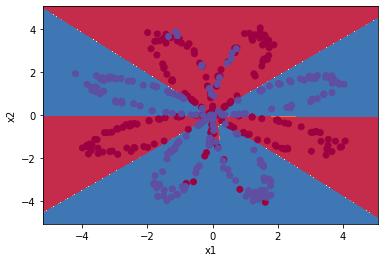

In [115]:
# 15 layers
parameters = model(features, labels, 15, 15000)

plot_decision_boundary(lambda X: predict(parameters, X.T), features, labels.ravel())

### Question 9 -- 5 points
Play with the learning_rate and explain how this changes performance.


Cost after iteration 0: 2.904868
Cost after iteration 100: 2.879068
Cost after iteration 200: 2.853375
Cost after iteration 300: 2.827792
Cost after iteration 400: 2.802319
Cost after iteration 500: 2.776958
Cost after iteration 600: 2.751709
Cost after iteration 700: 2.726574
Cost after iteration 800: 2.701554
Cost after iteration 900: 2.676650
Cost after iteration 1000: 2.651863
Cost after iteration 1100: 2.627195
Cost after iteration 1200: 2.602647
Cost after iteration 1300: 2.578219
Cost after iteration 1400: 2.553914
Cost after iteration 1500: 2.529733
Cost after iteration 1600: 2.505677
Cost after iteration 1700: 2.481747
Cost after iteration 1800: 2.457944
Cost after iteration 1900: 2.434270
Cost after iteration 2000: 2.410727
Cost after iteration 2100: 2.387315
Cost after iteration 2200: 2.364036
Cost after iteration 2300: 2.340891
Cost after iteration 2400: 2.317882
Cost after iteration 2500: 2.295009
Cost after iteration 2600: 2.272275
Cost after iteration 2700: 2.249680
Cost

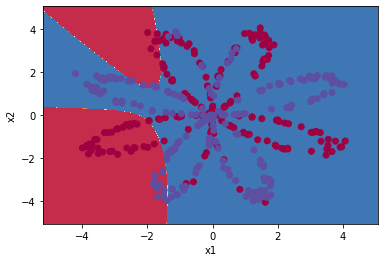

In [116]:
# Learning rate of .0001
parameters = model(features, labels, 15, 15000, learning_rate=.0001)

plot_decision_boundary(lambda X: predict(parameters, X.T), features, labels.ravel())

Cost after iteration 0: 2.773714
Cost after iteration 100: 2.773688
Cost after iteration 200: 2.773662
Cost after iteration 300: 2.773636
Cost after iteration 400: 2.773610
Cost after iteration 500: 2.773584
Cost after iteration 600: 2.773558
Cost after iteration 700: 2.773532
Cost after iteration 800: 2.773506
Cost after iteration 900: 2.773480
Cost after iteration 1000: 2.773454
Cost after iteration 1100: 2.773428
Cost after iteration 1200: 2.773402
Cost after iteration 1300: 2.773376
Cost after iteration 1400: 2.773350
Cost after iteration 1500: 2.773324
Cost after iteration 1600: 2.773298
Cost after iteration 1700: 2.773272
Cost after iteration 1800: 2.773246
Cost after iteration 1900: 2.773220
Cost after iteration 2000: 2.773194
Cost after iteration 2100: 2.773168
Cost after iteration 2200: 2.773142
Cost after iteration 2300: 2.773117
Cost after iteration 2400: 2.773091
Cost after iteration 2500: 2.773065
Cost after iteration 2600: 2.773039
Cost after iteration 2700: 2.773013
Cost

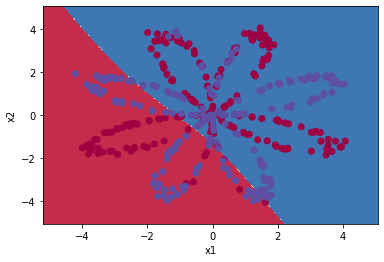

In [117]:
# Learning rate = .0000001
parameters = model(features, labels, 15, 15000, learning_rate=.0000001)

plot_decision_boundary(lambda X: predict(parameters, X.T), features, labels.ravel())

### Question 10 -- 5 points

Do you think that the model is overfitting? explain your answer?

Yes the model is overfitting because its classifying in an almost linear way but when compared to the true labels its has a low accuracy.
I would guess that this is because it falls into local minimum. Increasing the hidden layers and learning rate would help create a more accurate model.